# Лабораторная работа 2

## Задачи и порядок выполнения работы

1. Получить массив отсчётов исходного сигнала из заранее подготовленного звукового WAV-файла с записанной речью или мелодией длительностью 8−15 с.
2. Построить графики звукового сигнала во временной и частотной области.
3. Добавить нормальный шум мощностью сопоставимой с мощностью звукового сигнала.
4. Построить графики сигнала во временной и частотной области.
5. Записать полученный сигнал в новый WAV-файл. Прослушать полученный файл средствами операционной системы и сравнить с исходным.
6. Провести фильтрацию сигнала методом когерентного накопления для количества реализаций 𝑁.
7. Построить графики сигнала во временной и частотной области.
8. Записать полученный сигнал в новый WAV-файл. Прослушать полученный файл средствами операционной системы и сравнить с исходным.

### 1. Загружаем нужный файл

In [1]:
import IPython

IPython.display.Audio(filename='melody.mp3')

In [2]:
import librosa

(data, sampling_rate) = librosa.load('melody.mp3')
print(data, sampling_rate)

[-9.7843464e-03 -1.5854906e-02 -1.0835272e-02 ...  4.4455609e-15
  4.7876979e-15  3.2063119e-15] 22050


### 2. Строим графики

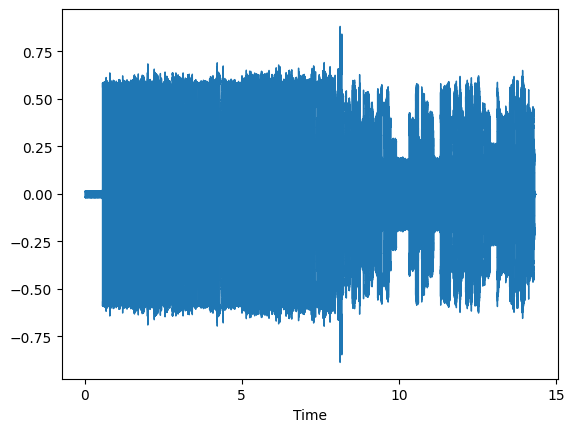

In [3]:
librosa.display.waveshow(data, sr=sampling_rate)

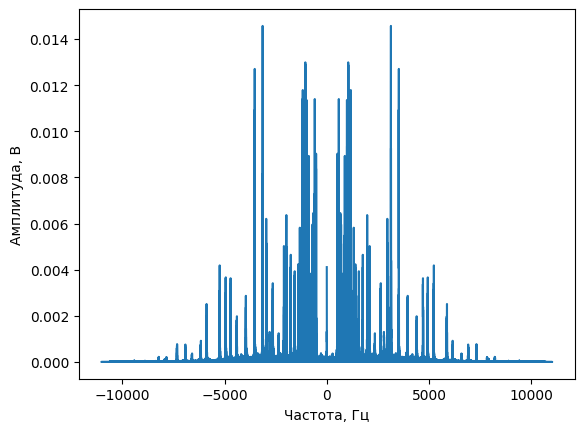

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq

def freq_plot(data: np.ndarray):
    sp = fft(data)
    length = len(data)
    freq = fftfreq(length, 1 / sampling_rate)
    plt.plot(freq, np.abs(sp / length))
    plt.xlabel('Частота, Гц')
    plt.ylabel('Амплитуда, В')

freq_plot(data)

### 3. Генерируем шум

(100, 316248)


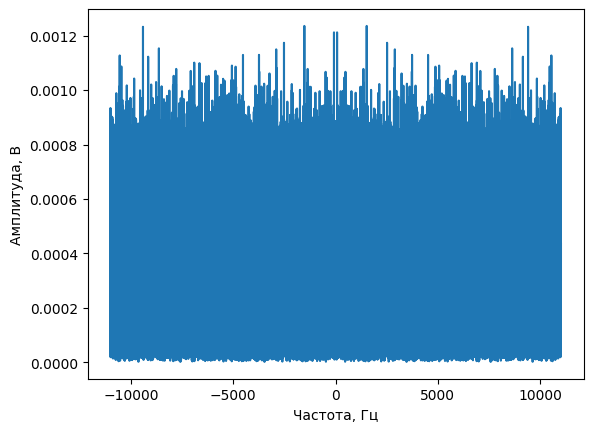

In [5]:
measurements_count = 100
noise = np.random.normal(loc=0.0, scale=0.20, size=(measurements_count, len(data)))

freq_plot(noise[0])
print(noise.shape)

#### Добавляем шум к сигналу

In [6]:
noisy_data = np.tile(data, (measurements_count, 1)) + noise

print(noisy_data.shape)

(100, 316248)


#### Сохраняем сигнал

In [7]:
import soundfile

soundfile.write(
    "noisy_melody.wav",
    data=noisy_data[0],
    samplerate=sampling_rate
)

IPython.display.Audio("noisy_melody.wav")

### 5. Строим графики зашумленного сигнала

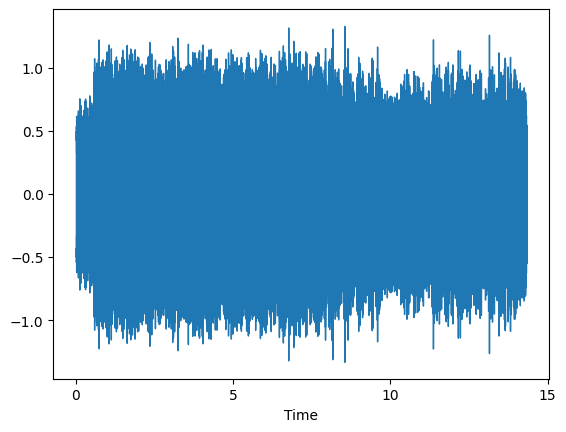

In [8]:
librosa.display.waveshow(noisy_data[0])

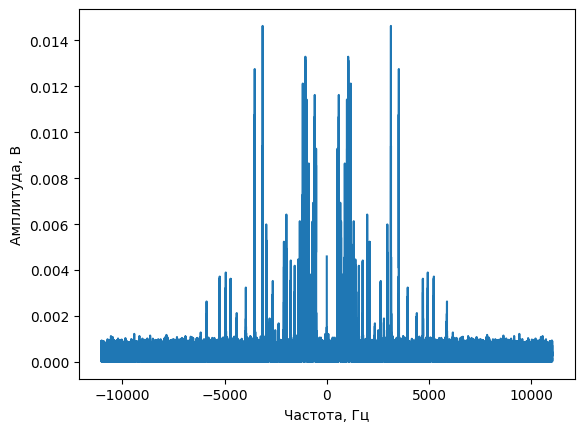

In [9]:
freq_plot(noisy_data[0])

### 6. Проведем фильтрацию полученного сигнала

In [10]:
filtered = np.average(noisy_data, axis=0)

print(filtered)

[-0.03063958 -0.00913391 -0.006477   ... -0.02509223 -0.01862149
  0.02243139]


### 7. Построим графики

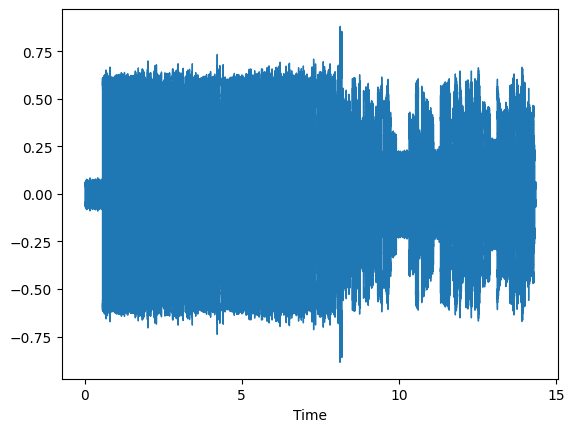

In [11]:
librosa.display.waveshow(filtered)

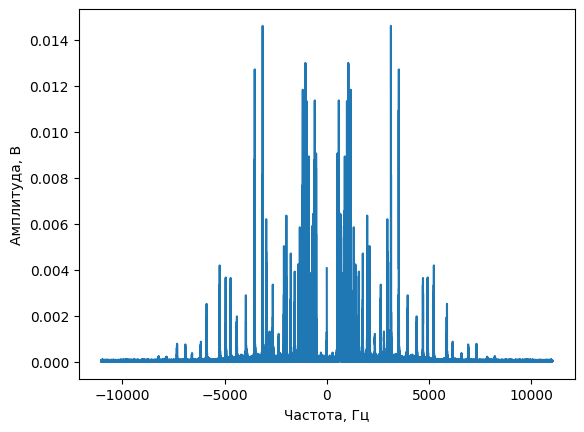

In [12]:
freq_plot(filtered)

### 8. Сохраним и послушаем

In [13]:
soundfile.write(
    "filtered_melody.wav",
    data=filtered,
    samplerate=sampling_rate
)

IPython.display.Audio("filtered_melody.wav")